# Exploratory Data Analysis (of Everything)

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats 
import size.viz
import size.analytical
import seaborn as sns
carbons = ['acetate', 'sorbitol', 'glycerol', 'glucose', 'glucoseCAA', 'RDM', 'ezMOPS', 'LB']
cmap = sns.color_palette("ch:start=.2,rot=-.3", n_colors=len(carbons) + 2).as_hex()
carb_colors = {c:k for c, k in zip(carbons, cmap[2:])}
cor, pal = size.viz.matplotlib_style()

In [85]:
# Load the various datasets 
sizes = pd.read_csv('../../data/summaries/summarized_size_measurements.csv')
sizes.dropna(inplace=True)
sizes = sizes[sizes['temperature_C']==37]
wt_sizes = sizes[(sizes['strain']=='wildtype') & (sizes['inducer_conc']==0)]
growth_rates = pd.read_csv('../../data/summaries/summarized_growth_measurements.csv')
growth_rates_agg = growth_rates.groupby(['strain', 'carbon_source']
                          )['growth_rate_hr'].agg(('mean', 'sem')).reset_index()
cell_counts = pd.read_csv('../../data/summaries/flow_cytometry_counts.csv')
cell_counts_agg = cell_counts.groupby(['strain', 'carbon_source', 'overexpression', 
                                       'inducer', 'inducer_conc', 'date']
                                       )['cells_per_biomass'].agg(
                                        ('mean')).reset_index()
cell_counts_errs = cell_counts_agg.groupby(['strain', 'carbon_source']
                       )['cells_per_biomass'].agg(('mean', 'sem')).reset_index()
protein = pd.read_csv('../../data/summaries/summarized_protein_measurements.csv')
protein_agg = protein.groupby(['strain', 'carbon_source', 'overexpression', 
                               'inducer', 'inducer_conc_ng_ml']
                     )['prot_ug_per_biomass'].agg(('mean', 'sem')).reset_index()

## Exploring Replicate Variability

In [86]:
sizes.carbon_source.unique()

array(['glucoseCAA', 'glucose', 'glycerol', 'LB', 'acetate', 'sorbitol',
       'ezMOPS', 'RDM'], dtype=object)

## Exploring Growth Rate Dependence

### Size Trends

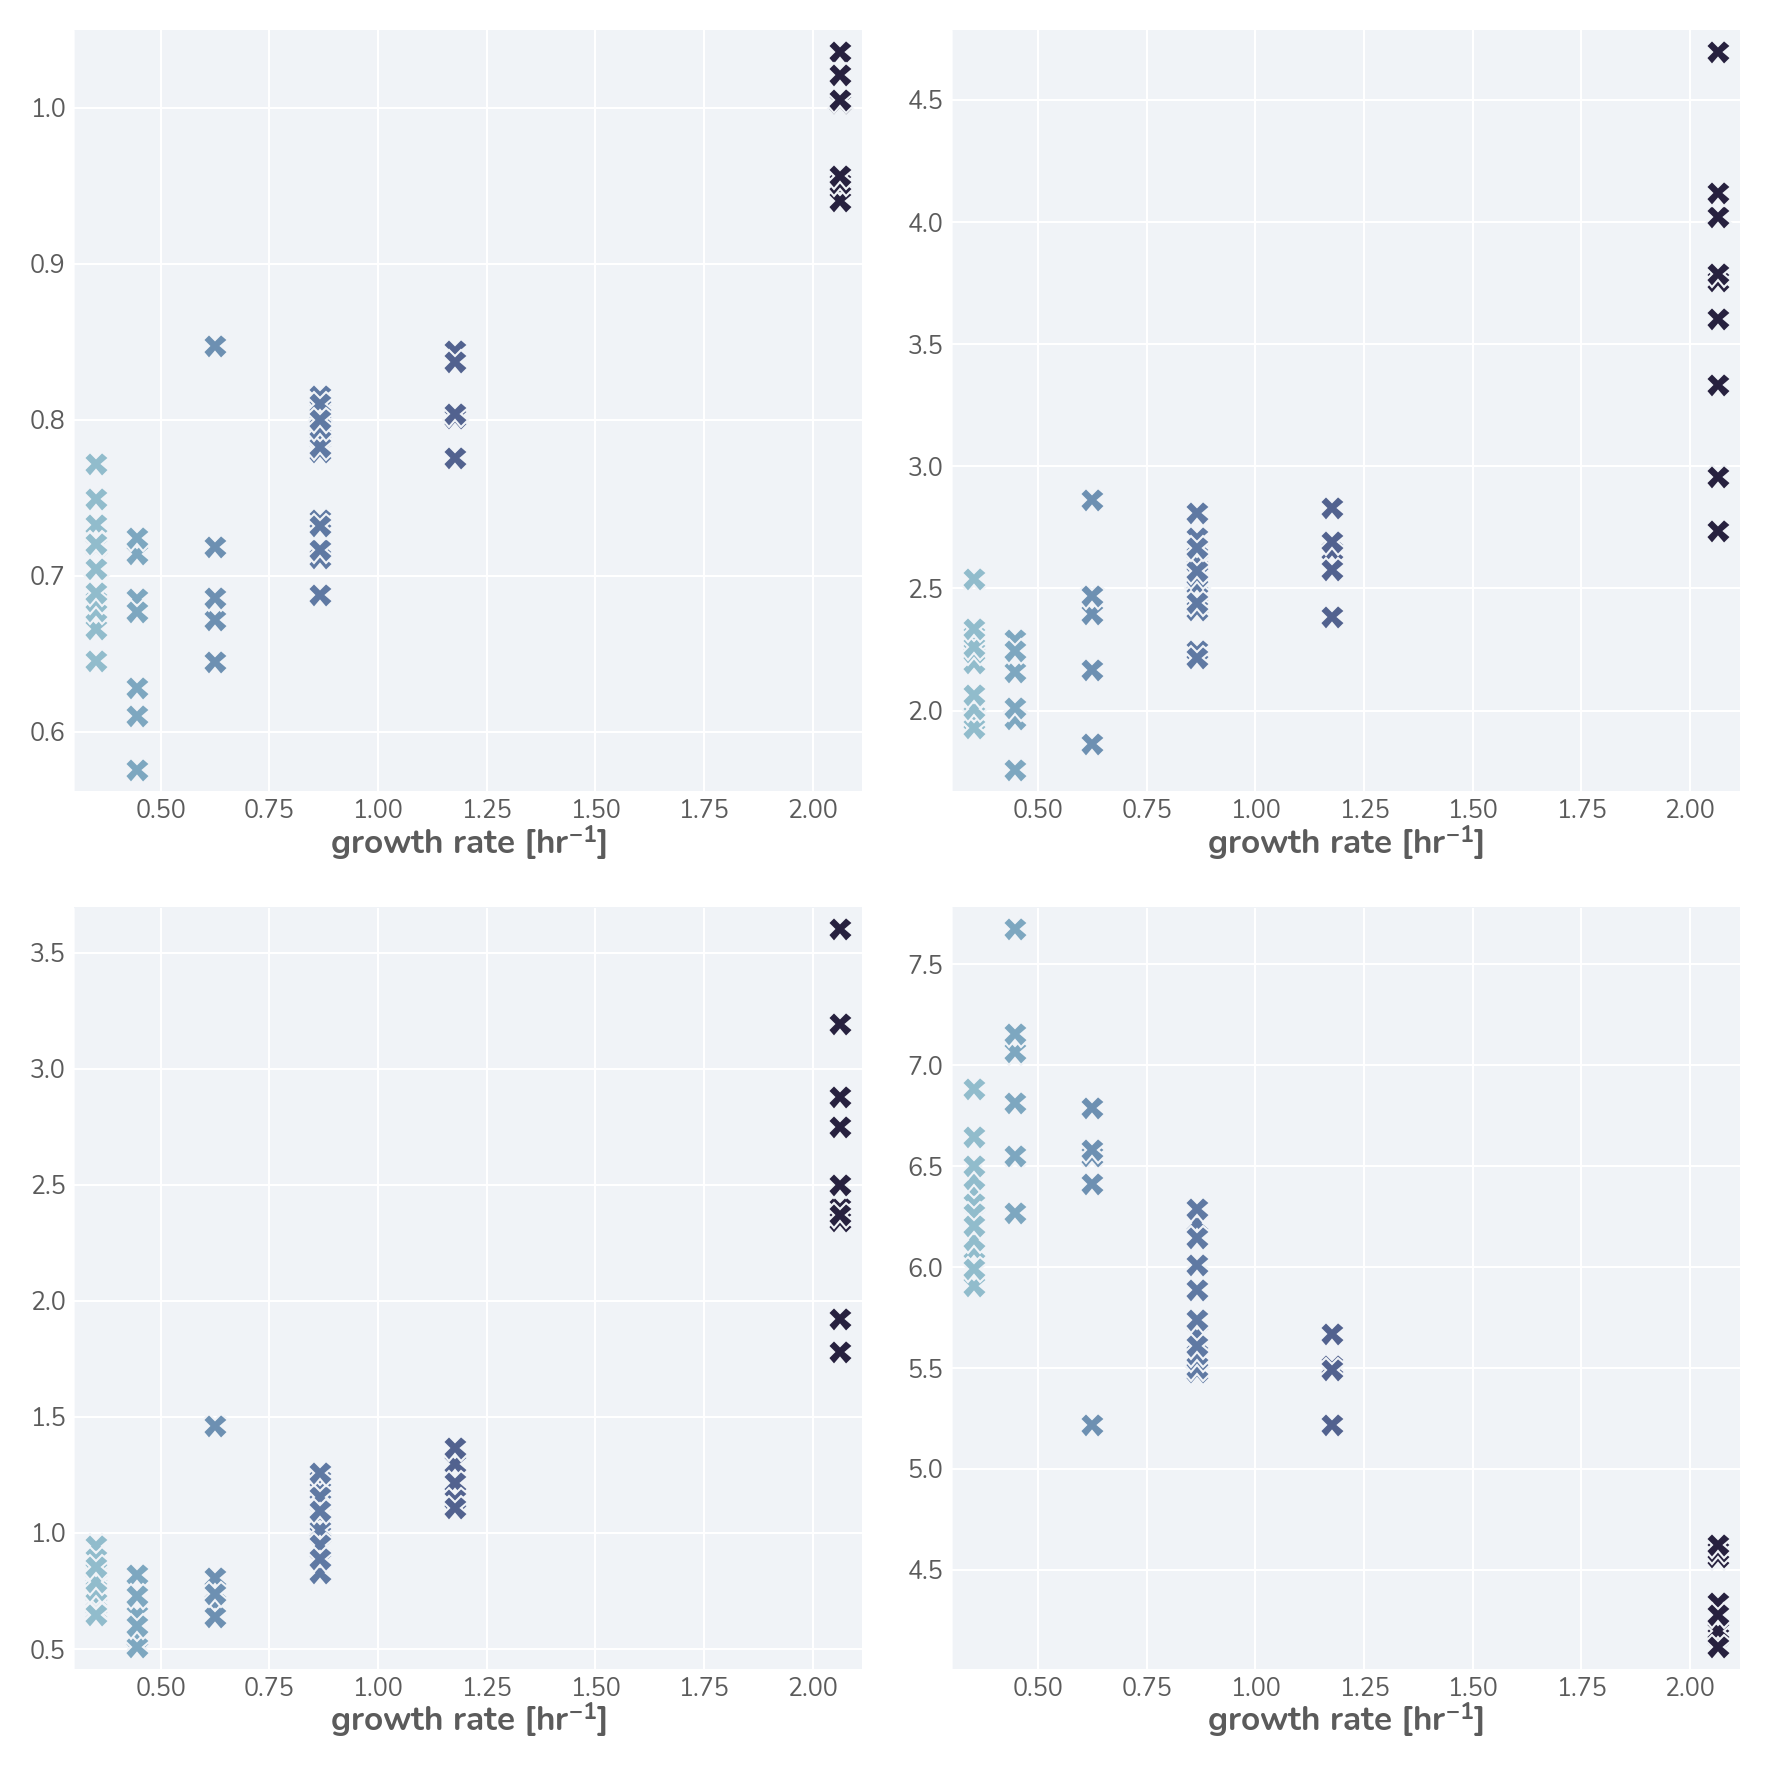

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
for a in ax.ravel():
    a.set_xlabel('growth rate [hr$^{-1}$]')

for g, d in wt_sizes.groupby(['carbon_source']):

    _gr = growth_rates_agg[(growth_rates_agg['carbon_source']==g) & 
                           (growth_rates_agg['strain']=='WT')]
    surf = size.analytical.surface_area(d['length'].values.astype(float), d['width_median'].values.astype(float))
    if len(_gr) == 0:
        continue
    __gr = np.ones(len(d)) * _gr['mean'].values[0]
    ax[0,0].plot(__gr, d['width_median'].values.astype(float), 'X', color=carb_colors[g])
    ax[0,1].plot(__gr, d['length'].values.astype(float), 'X', color=carb_colors[g])
    ax[1,0].plot(__gr, d['volume'].values.astype(float), 'X', color=carb_colors[g])
    ax[1,1].plot(__gr, surf / d['volume'].values.astype(float), 'X', color=carb_colors[g])

plt.tight_layout()

In [76]:
wt_sizes[wt_sizes['carbon_source']=='acetate']

,date,run_no,carbon_source,strain,inducer,inducer_conc,temperature_C,width_median,width_median.1,length,length.1,volume,volume.1,surface_to_volume,surface_to_volume.1,periplasm_volume,periplasm_volume.1
40,2021-08-04,1.0,acetate,wildtype,noind,0.0,37.0,0.6454056209661965,0.004412208620245826,2.1929973366476605,0.028822053550014593,0.645964455098128,0.010616965329873922,6.952223283111407,0.04317556839683073,0.10527059385550243,0.0014065728644701977


In [81]:
d

,date,run_no,carbon_source,strain,inducer,inducer_conc,temperature_C,width_median,width_median.1,length,length.1,volume,volume.1,surface_to_volume,surface_to_volume.1,periplasm_volume,periplasm_volume.1
18,2020-12-04,1.0,ezMOPS,wildtype,none,0.0,37.0,0.9422344755155613,0.0047074020895145,4.209927311547495,0.0575925172127764,2.710896796383949,0.04268793145171792,4.620729770306673,0.021441104261173648,0.30067020494192226,0.0040765694265687755


In [77]:
sizes[sizes['carbon_source']=='acetate']

,date,run_no,carbon_source,strain,inducer,inducer_conc,temperature_C,width_median,width_median.1,length,length.1,volume,volume.1,surface_to_volume,surface_to_volume.1,periplasm_volume,periplasm_volume.1
6,2020-07-31,1.0,acetate,wildtype,none,0.0,37.0,0.7187655949988929,0.003949720551703464,1.929536181884319,0.019313683491491845,0.6834460875001747,0.008362403547500693,33.93338252437777,27.474035293501156,0.1032235065610721,0.0010407636416134983
7,2020-09-11,1.0,acetate,wildtype,none,0.0,37.0,0.7325954737854731,0.003049130812774399,1.9582691220000568,0.0191025715173125,0.7198899743596671,0.008631955076040468,6.30655832940208,0.022192483882639395,0.10706606379396162,0.0010493319411936613
8,2020-09-18,1.0,acetate,wildtype,none,0.0,37.0,0.7212113942609738,0.004364446286593366,1.9837206232306042,0.027538126754418146,0.7119035479790429,0.012511572813714391,6.390467081467919,0.03765082003189059,0.10688361994448256,0.0015446840457368578
9,2020-09-29,1.0,acetate,wildtype,none,0.0,37.0,0.704722920823819,0.0026292141346411987,1.9294951508420222,0.01376261384743831,0.663414378856154,0.006544076494687028,6.5617916346210645,0.023623064740766246,0.10154595237333287,0.0007909942763799046
10,2020-10-06,1.0,acetate,wildtype,none,0.0,37.0,0.7715730602858302,0.005277160395436587,2.0075578418918405,0.020709509722326894,0.8238540920946402,0.01792527313644193,6.035928088992854,0.02830818629580244,0.11602639667187399,0.0014863880260673917
13,2020-11-11,1.0,acetate,wildtype,none,0.0,37.0,0.6656954977315271,0.006807607697843576,2.062336961518503,0.03225594018201451,0.6488775660422165,0.02192141168672668,6.847144023252722,0.051555766185569785,0.10249088860609161,0.0020609006538604684
19,2021-03-02,1.0,acetate,wildtype,atc,0.0,37.0,0.7204534166513958,0.004481132491180983,2.5373785339688113,0.03174493919132377,0.9437057573369183,0.017653953339755533,6.206811832716932,0.03520492091901603,0.13727966110415488,0.0019601966985706657
20,2021-03-02,1.0,acetate,wildtype,atc,50.0,37.0,0.7312415662023067,0.01061980845268379,2.300957658971785,0.06847948290172567,0.8857939704857092,0.040767799051994943,6.236496640736521,0.10202064604196831,0.12726142198546714,0.004610203023004129
26,2021-07-16,1.0,acetate,minKO,noind,0.0,37.0,0.6897973459636884,0.005791683390130268,2.143323320567929,0.042570412009973385,0.7221536005714798,0.0218540934256784,6.60414357049913,0.04647928138188529,0.1106701154535102,0.002505620213173481
27,2021-07-16,1.0,acetate,wildtype,none,0.0,37.0,0.6775220778872871,0.004025276711195311,2.3041569183865964,0.028749265757865215,0.7829406663973304,0.01965357944730125,6.681064606285324,0.03483175801434702,0.11840391941091986,0.002081776895602364
